<h2 style="color:#1f77b4;">Live Coding Parte 2</h2>

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv("data/house_eda.csv")
df.head()

precio_uf  superficie_m2  dormitorios  banos  antiguedad_anios  \
0  4947.042738      97.538684            1      3              12.0   
1  4375.562129      89.132206            3      2              39.0   
2  5082.919684      60.783049            4      3               8.0   
3  5870.726871     118.570570            2      1              26.0   
4  4289.261963     108.798326            1      1               1.0   

   distancia_centro_km tipo_vivienda sector  gasto_comun_uf  
0            10.919752          casa    sur        1.698835  
1            15.123260          casa  norte        1.295728  
2            18.306732  departamento  norte        1.982589  
3            11.910416          casa  norte        1.507754  
4            14.659356  departamento  norte        2.652326

In [4]:
df.shape

(120, 9)

<h5 style="color:#1f77b4;">1. Detecta valores perdidos y aplica técnicas de imputación adecuadas según el tipo de variable.</h5>

In [5]:
df.isnull().sum()

precio_uf              0
superficie_m2          0
dormitorios            0
banos                  0
antiguedad_anios       1
distancia_centro_km    0
tipo_vivienda          2
sector                 0
gasto_comun_uf         3
dtype: int64

In [6]:
# Diagnóstico rápido de nulos
nulos = df.isnull().sum().sort_values(ascending=False)
porc_nulos = (df.isnull().mean() * 100).sort_values(ascending=False)

resumen_nulos = pd.DataFrame({"nulos": nulos, "%": porc_nulos})
resumen_nulos


nulos         %
gasto_comun_uf           3  2.500000
tipo_vivienda            2  1.666667
antiguedad_anios         1  0.833333
precio_uf                0  0.000000
superficie_m2            0  0.000000
banos                    0  0.000000
dormitorios              0  0.000000
distancia_centro_km      0  0.000000
sector                   0  0.000000

Imputación 
- Numéricas: gasto_comun_uf (mediana por tipo vivienda)

In [ ]:
# Crear copia del DataFrame original
df_clean = df.copy()

In [ ]:
# Imputar nulos en gasto_comun_uf con mediana por tipo_vivienda
df_clean["gasto_comun_uf"] = df_clean["gasto_comun_uf"].fillna(
    df_clean.groupby("tipo_vivienda")["gasto_comun_uf"].transform("median")
)

In [ ]:
# Verificar nulos restantes
df_clean.isnull().sum().sort_values(ascending=False)

tipo_vivienda          2
antiguedad_anios       1
precio_uf              0
dormitorios            0
superficie_m2          0
banos                  0
distancia_centro_km    0
sector                 0
gasto_comun_uf         0
dtype: int64

Imputación 
* Categóricas: tipo_vivienda (moda)

In [65]:
# Ver la moda de tipo_vivienda
df_clean["tipo_vivienda"].mode()

0    departamento
Name: tipo_vivienda, dtype: object

In [66]:
# Imputar nulos en tipo_vivienda con la moda
df_clean["tipo_vivienda"] = df_clean["tipo_vivienda"].fillna(df_clean["tipo_vivienda"].mode()[0])

In [67]:
# Verificar nulos restantes
df_clean[df_clean["tipo_vivienda"].isna()]

Empty DataFrame
Columns: [precio_uf, superficie_m2, dormitorios, banos, antiguedad_anios, distancia_centro_km, tipo_vivienda, sector, gasto_comun_uf, outlier_if, if_score, precio_uf_win]
Index: []

In [68]:
df_clean.isnull().sum()

precio_uf              0
superficie_m2          0
dormitorios            0
banos                  0
antiguedad_anios       0
distancia_centro_km    0
tipo_vivienda          0
sector                 0
gasto_comun_uf         0
outlier_if             0
if_score               0
precio_uf_win          0
dtype: int64

Imputación condicional:
* departamentos → suelen tener gasto común > 0
* casas → suelen tener gasto común bajo o cercano a 0

In [83]:
# Verificar nulos restantes
df[df["tipo_vivienda"].isna()]

precio_uf  superficie_m2  dormitorios  banos  antiguedad_anios  \
6   5921.291534      67.265314            4      3              28.0   
28  3959.425179      94.615846            1      2              12.0   

    distancia_centro_km tipo_vivienda sector  gasto_comun_uf  
6              7.868086           NaN    sur        0.986907  
28            15.801031           NaN  norte        1.662512

In [79]:
# Crear copia del DataFrame original
df_cond = df.copy()

In [72]:
# Crear condición para identificar nulos en tipo_vivienda
cond = df_cond["tipo_vivienda"].isna()

In [81]:
df_cond.loc[
    cond & (df_cond["gasto_comun_uf"] > 0.5),
    "tipo_vivienda"
] = "departamento"

df_cond.loc[
    cond & (df_cond["gasto_comun_uf"] <= 0.5),
    "tipo_vivienda"
] = "casa"

In [85]:
df_cond.isnull().sum().sort_values(ascending=False)

gasto_comun_uf         3
antiguedad_anios       1
precio_uf              0
dormitorios            0
superficie_m2          0
banos                  0
distancia_centro_km    0
tipo_vivienda          0
sector                 0
dtype: int64

- antiguedad_anios

In [86]:
df[df["antiguedad_anios"].isna()]

precio_uf  superficie_m2  dormitorios  banos  antiguedad_anios  \
119    22000.0          520.0            2      1               NaN   

     distancia_centro_km tipo_vivienda  sector  gasto_comun_uf  
119                  0.1          casa  centro             NaN

In [ ]:
# Crear copia del DataFrame original
df_anios = df.copy()

In [ ]:
# Agrupar por tipo_vivienda y calcular la mediana de antiguedad_anios
df_anios.groupby("tipo_vivienda")["antiguedad_anios"].transform("median")

0      20.0
1      20.0
2      19.0
3      20.0
4      19.0
       ... 
115    20.0
116    19.0
117    19.0
118    19.0
119    20.0
Name: antiguedad_anios, Length: 120, dtype: float64

In [89]:
# Imputar nulos en antiguedad_anios con mediana por tipo_vivienda
df_anios["antiguedad_anios"] = df_anios["antiguedad_anios"].fillna(
    df_anios.groupby("tipo_vivienda")["antiguedad_anios"].transform("median")
)


In [90]:
df_anios.isnull().sum().sort_values(ascending=False)

gasto_comun_uf         3
tipo_vivienda          2
precio_uf              0
superficie_m2          0
dormitorios            0
antiguedad_anios       0
banos                  0
distancia_centro_km    0
sector                 0
dtype: int64

<h5 style="color:#1f77b4;">2. Identificar outliers con al menos dos métodos diferentes (uno estadístico y uno basado en ML).</h5>

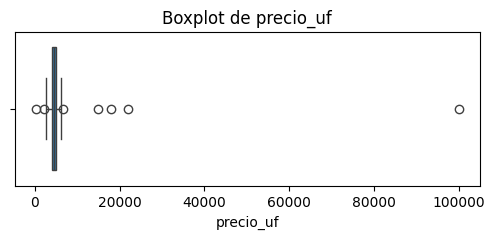

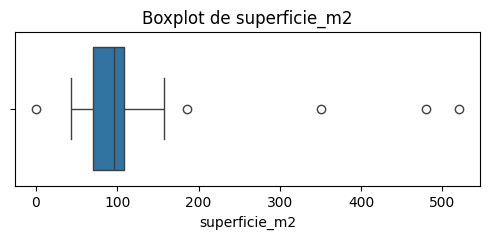

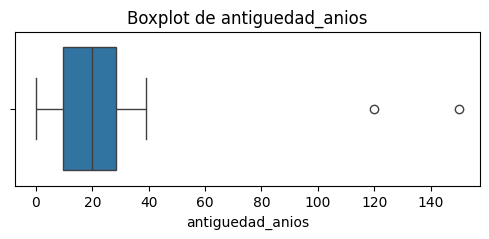

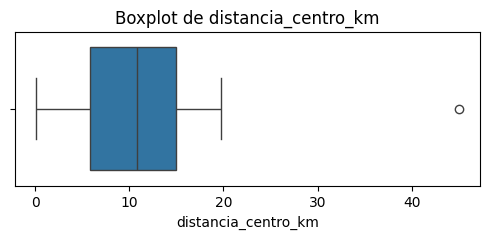

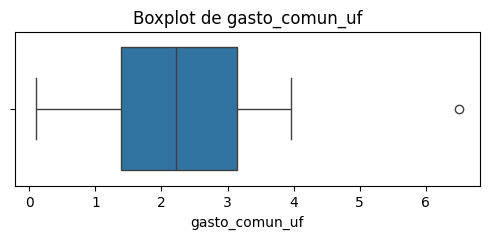

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = [
    "precio_uf",
    "superficie_m2",
    "antiguedad_anios",
    "distancia_centro_km",
    "gasto_comun_uf"
]

for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df_clean[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


2.1 IQR (para Fare)

In [35]:
df_clean.describe()

precio_uf  superficie_m2  dormitorios       banos  antiguedad_anios  \
count    120.000000     120.000000   120.000000  120.000000        120.000000   
mean    5527.959333     100.063904     2.516667    1.966667         21.175000   
std     9023.818878      63.052083     1.250098    0.978194         18.834379   
min      300.000000       0.000000     1.000000    1.000000          0.000000   
25%     3985.312213      70.215186     1.000000    1.000000          9.750000   
50%     4434.094783      95.519421     2.000000    2.000000         20.000000   
75%     4950.767226     108.087091     4.000000    3.000000         28.250000   
max    99999.000000     520.000000     7.000000    6.000000        150.000000   

       distancia_centro_km  gasto_comun_uf  
count           120.000000      120.000000  
mean             10.458421        2.241675  
std               6.246253        1.064391  
min               0.100000        0.100000  
25%               5.827731        1.394193  
50%              10.784963        2.225389  
75%              14.938930        3.146958  
max              45.000000        6.500000

In [36]:
df_clean["banos"].value_counts()

banos
1    50
3    39
2    29
5     1
6     1
Name: count, dtype: int64

In [37]:
df_clean["dormitorios"].value_counts()

dormitorios
2    34
1    31
4    31
3    22
6     1
7     1
Name: count, dtype: int64

In [ ]:
df_clean[df_clean["precio_uf"] > 50000]


In [ ]:
s = df_clean["precio_uf"]
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr

In [46]:
low, high

(np.float64(2537.1296927269013), np.float64(6398.949745536798))

In [50]:
# Filtrar outliers
outliers = df[(df['precio_uf']<low)| (df['precio_uf']>high)]
print("Outliers:", outliers['precio_uf'].tolist())

Outliers: [2142.2294063192303, 6716.917901236758, 15000.0, 18000.0, 99999.0, 300.0, 22000.0]


In [53]:
outliers.head(10)

precio_uf  superficie_m2  dormitorios  banos  antiguedad_anios  \
74    2142.229406      52.128819            1      1               7.0   
113   6716.917901      72.117407            4      1               5.0   
115  15000.000000     480.000000            2      2              16.0   
116  18000.000000     350.000000            1      3             120.0   
117  99999.000000      60.000000            6      5             150.0   
118    300.000000       0.000000            7      6               2.0   
119  22000.000000     520.000000            2      1               NaN   

     distancia_centro_km tipo_vivienda  sector  gasto_comun_uf  
74             10.921258          casa   norte        1.529156  
113            10.939043  departamento  centro        2.716343  
115             7.187074          casa     sur             NaN  
116             9.742414  departamento   norte        0.200000  
117             7.424534  departamento     sur        6.500000  
118            45.000000  departamento  centro        0.100000  
119             0.100000          casa  centro             NaN

Isolation Forest (multivariable)

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

features = [
    "precio_uf",
    "superficie_m2",
    "distancia_centro_km",
    "antiguedad_anios",
    "gasto_comun_uf"
]

X = df_clean[features].copy()


imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()

X_scaled = scaler.fit_transform(imputer.fit_transform(X))

iso = IsolationForest(n_estimators=200, contamination=0.05, random_state=42)
pred = iso.fit_predict(X_scaled)
score = iso.decision_function(X_scaled)

df_clean["outlier_if"] = (pred == -1)
df_clean["if_score"] = score

df_clean["outlier_if"].value_counts()


outlier_if
False    114
True       6
Name: count, dtype: int64

In [55]:
df_clean[df_clean["outlier_if"]][
    ["precio_uf", "superficie_m2", "distancia_centro_km",
     "antiguedad_anios", "tipo_vivienda", "if_score"]
].sort_values("if_score")


precio_uf  superficie_m2  distancia_centro_km  antiguedad_anios  \
117  99999.000000      60.000000             7.424534             150.0   
116  18000.000000     350.000000             9.742414             120.0   
118    300.000000       0.000000            45.000000               2.0   
119  22000.000000     520.000000             0.100000              20.0   
115  15000.000000     480.000000             7.187074              16.0   
33    3548.060164     103.048539            19.619023              38.0   

    tipo_vivienda  if_score  
117  departamento -0.349760  
116  departamento -0.263956  
118  departamento -0.250480  
119          casa -0.222893  
115          casa -0.157432  
33   departamento -0.003510

<h5 style="color:#1f77b4;">3. Aplica winsorización o transformaciones para reducir el impacto de valores extremos.</h5>

Winsorización en precio_uf

In [56]:
from scipy.stats.mstats import winsorize

df_wins = df.copy()

df_clean["precio_uf_win"] = winsorize(
    df_clean["precio_uf"],
    limits=[0.01, 0.01]  # 1% abajo y arriba
)



In [ ]:
df_clean[["precio_uf", "precio_uf_win"]].describe()

precio_uf  precio_uf_win
count    120.000000     120.000000
mean    5527.959333    4893.319578
std     9023.818878    2858.626400
min      300.000000    2142.229406
25%     3985.312213    3985.312213
50%     4434.094783    4434.094783
75%     4950.767226    4950.767226
max    99999.000000   22000.000000

<Axes: >

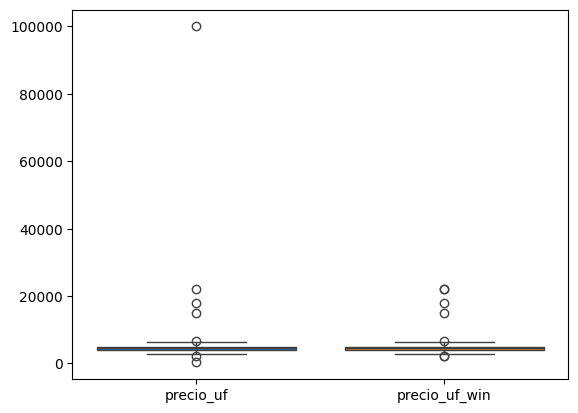

In [58]:
import seaborn as sns
sns.boxplot(data=df_clean[["precio_uf", "precio_uf_win"]])


Transformación log

In [59]:
df_log = df_clean.copy()
df_log["precio_log"] = np.log(df_log["precio_uf"])



<Axes: >

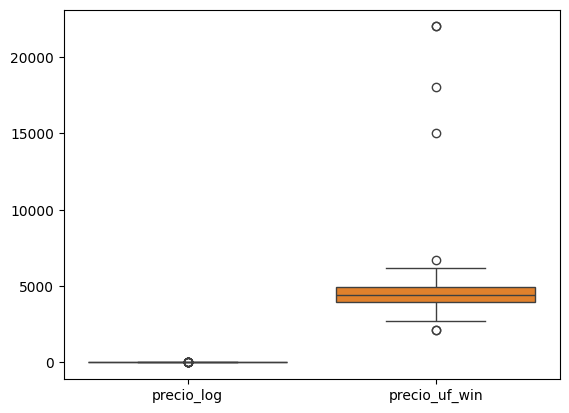

In [61]:
import seaborn as sns
sns.boxplot(data=df_log[["precio_log", "precio_uf_win"]])

<h5 style="color:#1f77b4;">4. Documenta el flujo y justifica las decisiones tomadas.</h5>

* Diagnostico faltantes y priorizo.
* Imputo numéricas con mediana por segmento (evito sesgos por mezcla de grupos).
* Imputo tipo_vivienda con una regla auditable basada en gasto_comun_uf.
* Detecto outliers univariados (IQR) y los interpreto a nivel de registro (error vs caso legítimo).
* Detecto outliers multivariables (Isolation Forest) para capturar rareza por combinación.
* Mitigo influencia de extremos con winsorización y (opcionalmente) transformación log para análisis/modelado.